Load the important Libraries. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

### Load the Dataset. 
The data.csv and data_stem.csv file contains the data for 1710 students.  

In [2]:
xDF = pd.read_csv('data/data.csv')
yDF = pd.read_csv('data/data_stem.csv')
yDF['Stem']=yDF['Stem']


### check the size of. our dataset 

In [3]:
print(xDF.shape)
print(yDF.shape)

xDF.head()

(1709, 10)
(1709, 11)


,ITEST_id,AveKnow,AveCarelessness,AveCorrect,AveResBored,AveResEngcon,AveResConf,AveResFrust,AveResOfftask,AveResGaming
0,1007,0.148059,0.093363,0.342175,0.285069,0.624269,0.104002,0.239385,0.236912,0.048286
1,101,0.195441,0.117634,0.403553,0.252399,0.619236,0.123829,0.241243,0.195611,0.069793
2,1013,0.324539,0.205643,0.442953,0.241589,0.671485,0.164270,0.085940,0.160825,0.039745
3,1016,0.105545,0.062372,0.271394,0.244065,0.642684,0.066851,0.128647,0.188778,0.237888
4,1020,0.363038,0.201753,0.489796,0.213347,0.680127,0.098354,0.126788,0.133223,0.129746


### Create the yDF dataframe with all the labels for our stem variables. 

In [4]:
yDF = yDF.drop(['ITEST_id', 'AveKnow', 'AveCarelessness', 'AveCorrect', 'AveResBored','AveResEngcon', 'AveResConf', 'AveResFrust', 'AveResOfftask', 'AveResGaming'] , axis=1)


## Data Cleaning Steps 

1. Check if there are any null values in the dataset 
2. If found in any of the feature or label dataframe then, 
    either remove the observation or fill it using any statistical method. 
3. since it's a classification problem, remove the TestID column. 

In [5]:
xDF.head()
xDF.isnull().sum()

ITEST_id           0
AveKnow            0
AveCarelessness    0
AveCorrect         0
AveResBored        0
AveResEngcon       0
AveResConf         0
AveResFrust        0
AveResOfftask      0
AveResGaming       0
dtype: int64

In [6]:
yDF[yDF.Stem.isnull()]
print(xDF.shape)
print(yDF.shape)

(1709, 10)
(1709, 1)


Null values found in the test dataset. Delete it from the training and the test data set. 
Moving forward observed the TestID as non-relevant parameter so removed it from the dataset. 

In [7]:
xDF.drop(1656, inplace=True, axis=0)
yDF.drop(1656, inplace=True, axis=0)


In [8]:
xDF.drop(['ITEST_id'], axis=1, inplace=True)
xDF.head()

,AveKnow,AveCarelessness,AveCorrect,AveResBored,AveResEngcon,AveResConf,AveResFrust,AveResOfftask,AveResGaming
0,0.148059,0.093363,0.342175,0.285069,0.624269,0.104002,0.239385,0.236912,0.048286
1,0.195441,0.117634,0.403553,0.252399,0.619236,0.123829,0.241243,0.195611,0.069793
2,0.324539,0.205643,0.442953,0.241589,0.671485,0.164270,0.085940,0.160825,0.039745
3,0.105545,0.062372,0.271394,0.244065,0.642684,0.066851,0.128647,0.188778,0.237888
4,0.363038,0.201753,0.489796,0.213347,0.680127,0.098354,0.126788,0.133223,0.129746


Noticed that the values in the STem cloumn are 0.0 and 1.0, so rounding them off, 

In [9]:
yDF.Stem = yDF.Stem.apply(lambda x: round(x))
yDF.head()

,Stem
0,0
1,0
2,0
3,0
4,0


## Check for skewedness in the classes. 

1. The classes in our dataset doesn't seems to be highly skewed, which is good. 

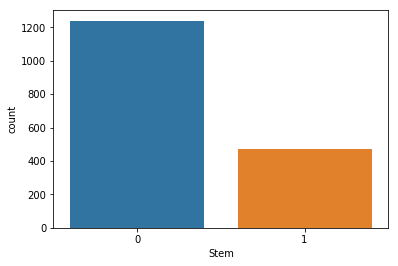

In [10]:
y = yDF.Stem
ax = sns.countplot(y,label="Count")      

Stem, NonStem = y.value_counts()

# Data Visualization 

## Check for the correlation between the different features


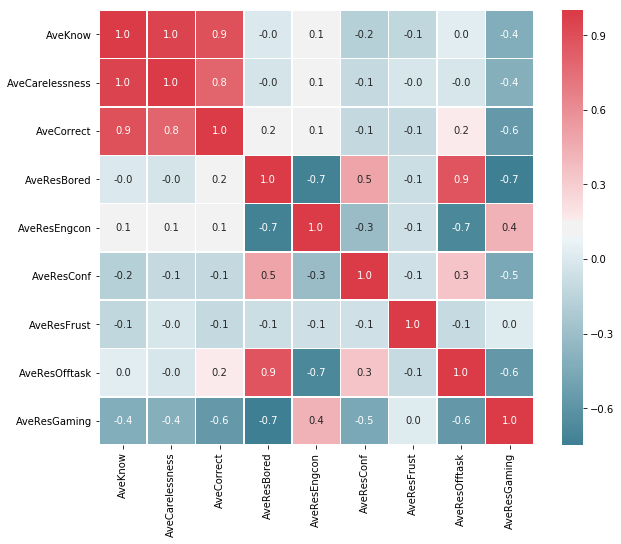

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
corr = xDF.corr()
sns.heatmap(corr,cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True, linewidths=.5, fmt= '.1f', ax=ax)

The <b>AvgCarelessness, Aveknoweldge, AveCorrect </b> are positively correlated.
The <b>AvgResEngcon, AvgResBored, AvgResGaming </b> are negatively correlated.

## Check for Regression with the correlated features 

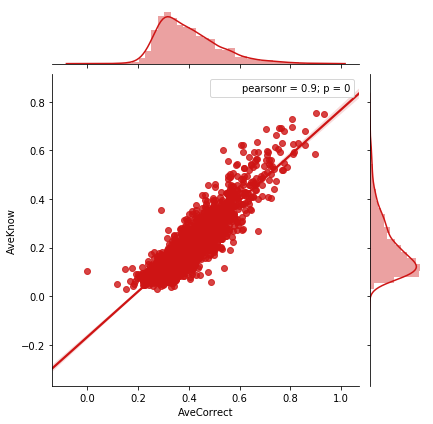

In [12]:
sns.jointplot(xDF.AveCorrect,
              xDF.AveKnow, kind="reg", color="#ce1414")

 ## Pair Plots
Generated pairplot for the different features for checking the relationshup among the features. 
The avgresolution off task and gaming has a exponential relationship with a -ve slope. 


KeyboardInterrupt: 

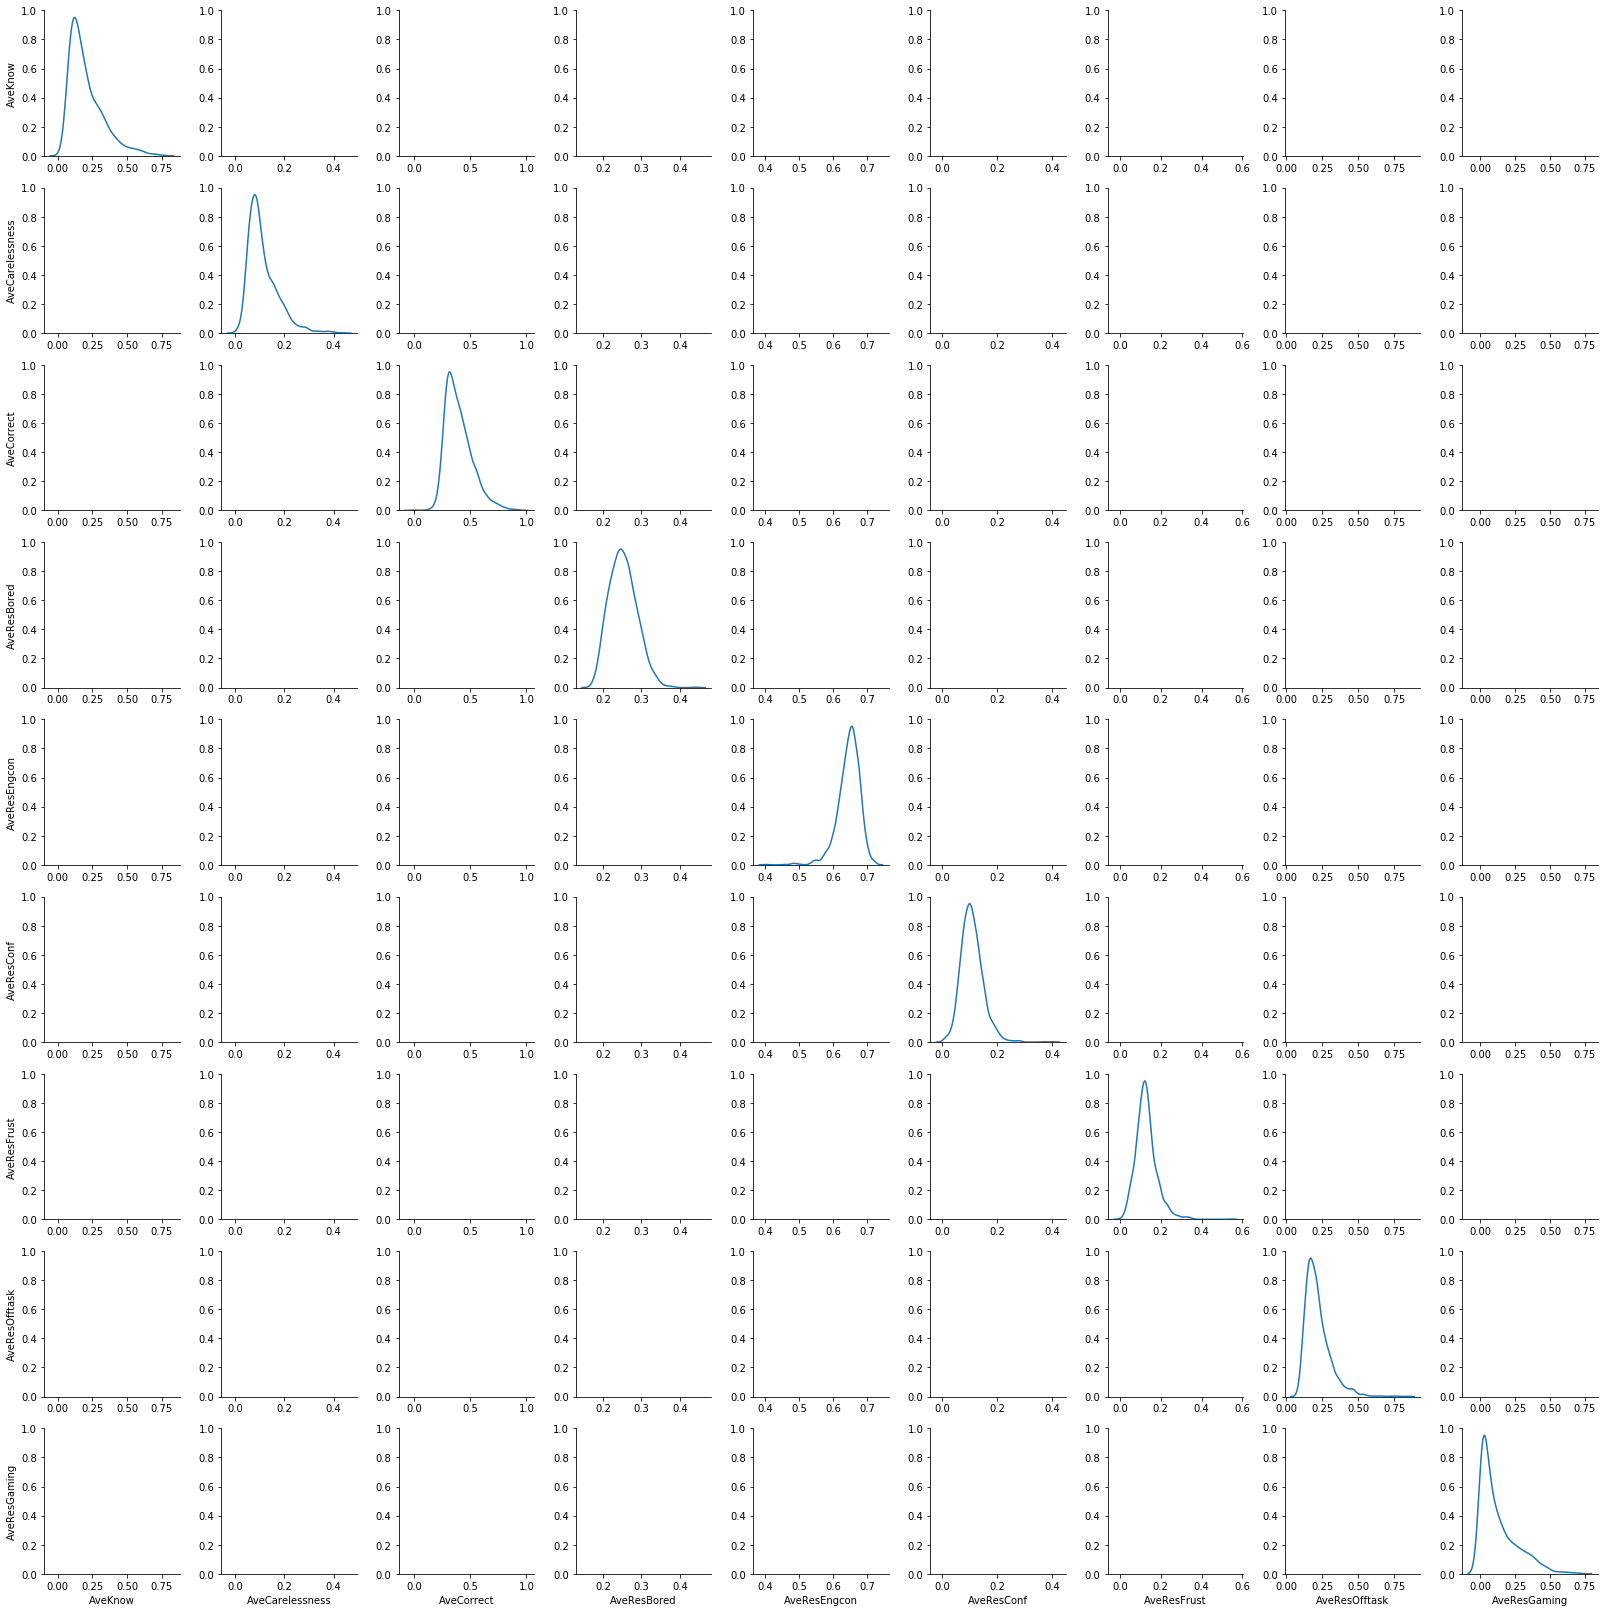

In [13]:
sns.pairplot(xDF,diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

In [ ]:
import time
sns.set(style="whitegrid", palette="muted")
data_dia = yDF
data = xDF

data = pd.concat([y,data],axis=1)
data = pd.melt(data,id_vars="Stem",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="Stem", data=data)

plt.xticks(rotation=90)

# Checking Model Accuracy and F1-Score with different Classifiers using all the fetures

### Import the different classifiers from sklearn and metrics for model comparison

In [ ]:
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix

#### Split the data into test and training sets. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xDF, yDF, test_size=0.30, random_state=101)
print(X_train.shape, y_train.shape)
print(X_test.shape, X_test.shape)

In [ ]:
X_train.shape

In [ ]:
## Created a dictionary for easily accessing all the classifiers. 

clfs = {
    'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
    'svm1': SVC(kernel='linear'),
    'svm2': SVC(kernel='rbf'),
    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100, 100]),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

In [ ]:
## Create a dictionary for keeping the accuracy and f1 score for each classifier
'''
def executeClassifiers(X_train, y_train, X_test, y_test):     
    f1_scores = dict()
    acc_scores = dict()
    for clf_name in clfs:
        print(clf_name, X_train.shape, y_train.shape)
        clf = clfs[clf_name]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        f1_scores[clf_name] = f1_score( y_test, y_pred)
        acc_scores[clf_name] = accuracy_score(y_test, y_pred)
    return f1_scores, acc_scores
'''
def executeClassifiers(X_train, y_train, X_test, y_test):     
    f1_scores = dict()
    acc_scores = dict()
    confMatrix =dict()
    for clf_name in clfs:
        kfold = KFold(n_splits=10, random_state=7)
        metric = 'accuracy'        
        clf = clfs[clf_name]
        results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring=metric)
#        clf.fit(X_train, y_train)
#        y_pred = clf.predict(X_test)
#        f1_scores[clf_name] = f1_score( y_test, y_pred)
#        acc_scores[clf_name] = accuracy_score(y_test, y_pred)
        acc_scores[clf_name] = results.mean()
#        confMatrix[clf_name] = confusion_matrix(y_test,y_pred)
    return f1_scores, acc_scores

In [ ]:
f1_scores, acc_scores = executeClassifiers(X_train, y_train, X_test, y_test)
acc = pd.DataFrame(acc_scores, index=[0])
eval_matrix = pd.DataFrame(f1_scores, index=[0])
eval_matrix = eval_matrix.append(acc,ignore_index=True)


In [ ]:
eval_matrix.head()

# Feature Selection 

FRom the correlation matrix and the visualization we found a lot features correlated with each other. 

The <b>AvgCarelessness, Aveknoweldge, AveCorrect </b> are positively correlated.

The <b>AvgResEngcon, AvgResBored, AvgResGaming </b> are negatively correlated.

In [ ]:
xTrain_New = X_train.drop(['AveResEngcon','AveResBored','AveCarelessness','AveCorrect'],axis=1)
xTest_New = X_test.drop(['AveResEngcon','AveResBored','AveCarelessness','AveCorrect'],axis=1)

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(xTrain_New.corr(), annot=True, linewidths=.5, fmt= '.1f')


In [ ]:
f1_scores, acc_scores = executeClassifiers(xTrain_New, y_train, xTest_New, y_test)
acc = pd.DataFrame(acc_scores, index=[0])
f1= pd.DataFrame(f1_scores, index=[0])
eval_matrix = eval_matrix.append([f1,acc],ignore_index=True)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)

In [ ]:
fscore = select_feature.scores_
fDF = pd.DataFrame([fscore, xDF.columns])
fDF = fDF.transpose()
fDF.set_index(1, inplace=True)
fDF.sort_values(0,ascending=False, inplace=True)
xNewFeature = fDF.iloc[:5,0:0].index.values

### CAlculate the accuracy and the F1 score using new features selected by select_feature

In [ ]:
f1_scores, acc_scores = executeClassifiers(X_train[xNewFeature], y_train, X_test[xNewFeature], y_test)
acc = pd.DataFrame(acc_scores, index=[0])
f1= pd.DataFrame(f1_scores, index=[0])
eval_matrix.append(acc,ignore_index=True)

In [ ]:
eval_matrix

In [ ]:
sns.pairplot(X_train[xNewFeature],diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

from the above plot generated using the new feature we still see correlation between the <b> AveCarelessness and AveKnow </b>

Also there is a exponential relationship between the offtask and gaming. 

In [ ]:
#xNew = xNew.drop(['AveCarelessness'])
X_train['logAveResGaming'] =np.log(X_train.AveResGaming)

X_test['logAveResGaming'] =np.log(X_test.AveResGaming)
X_train['correxconfu'] = X_train.AveResEngcon * X_train.AveCorrect
X_test['correxconfu'] = X_test.AveResEngcon * X_test.AveCorrect

plt.plot(X_train.AveResOfftask, np.log(X_train.AveResGaming), 'r*')

In [ ]:
xNewFeature = [ 'AveResFrust', 
                'AveKnow', 'AveResEngcon', 'AveResOfftask', 'AveCorrect', 'correxconfu' ]

In [ ]:
X_train[xNewFeature].head()

In [ ]:
f1_scores, acc_scores = executeClassifiers(X_train[xNewFeature], y_train, X_test[xNewFeature], y_test)
acc = pd.DataFrame(acc_scores, index=[0])
f1= pd.DataFrame(f1_scores, index=[0])
eval_matrix = eval_matrix.append([f1,acc],ignore_index=True)

In [ ]:
eval_matrix

In [ ]:
esti.fit(X_train[xNewFeature], y_train)

In [ ]:
predict = esti.predict(X_test[xNewFeature])

In [ ]:
accuracy_score(y_test,predict)